In [ ]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , confusion_matrix

In [22]:
df = pd.read_csv("data/telecom_churn.csv")

In [23]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [25]:
target = df["Churn"] 

In [26]:
X = df.drop(["Churn"] , axis = 1 )

In [27]:
x_train , x_test , y_train , y_test = train_test_split(X , target , test_size = 0.2 , random_state = 42)

In [134]:
tree_model = DecisionTreeClassifier(random_state = 42)
fold = KFold(n_splits = 5)
par_tree = {
    
    "max_depth" : [8,10,12],
    "min_samples_leaf" : [5,10]
}

In [135]:
grid_tree = GridSearchCV(estimator=tree_model, param_grid=par_tree , cv =fold , verbose = 1 )

In [136]:
grid_tree.fit(x_train , y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [8, 10, 12], 'min_samples_leaf': [5, 10]},
             verbose=1)

In [137]:
grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=42)

In [138]:
#for interpretention 
grid_tree.cv_results_

{'mean_fit_time': array([0.0211884 , 0.01958699, 0.0187881 , 0.01798692, 0.02023287,
        0.02070279]),
 'std_fit_time': array([0.0044438 , 0.00293841, 0.00039959, 0.0010948 , 0.00073971,
        0.00208317]),
 'mean_score_time': array([0.00500016, 0.00419903, 0.00340075, 0.00339971, 0.00320196,
        0.00399861]),
 'std_score_time': array([0.00179115, 0.00116491, 0.00048856, 0.00048951, 0.00039996,
        0.00063159]),
 'param_max_depth': masked_array(data=[8, 8, 10, 10, 12, 12],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[5, 10, 5, 10, 5, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 8, 'min_samples_leaf': 5},
  {'max_depth': 8, 'min_samples_leaf': 10},
  {'max_depth': 10, 'min_samples_leaf': 5},
  {'max_depth': 10, 'min_samples_leaf': 10},
  {'max_depth': 12, 'min

In [142]:
tree = grid_tree.cv_results_["mean_test_score"].mean()

In [140]:
pred_tree = grid_tree.predict(x_test)

In [141]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       566
           1       0.84      0.58      0.69       101

    accuracy                           0.92       667
   macro avg       0.89      0.78      0.82       667
weighted avg       0.92      0.92      0.91       667



# Random forest 

In [122]:
rf_model = RandomForestClassifier(random_state = 42)

In [123]:
par_rf = {
    "n_estimators" : [30 , 60 , 90],
    "max_depth" : [10 ,15, 20],
    "max_features" : [4,5,6]
    
}

In [124]:
grid_rf = GridSearchCV(estimator=rf_model, param_grid=par_rf , cv =fold , verbose = 1 )

In [125]:
grid_rf.fit(x_train , y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 15, 20], 'max_features': [4, 5, 6],
                         'n_estimators': [30, 60, 90]},
             verbose=1)

In [126]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=20, max_features=4, n_estimators=90,
                       random_state=42)

In [127]:
print("mean Accuracy of cv :  " , grid_rf.cv_results_["mean_test_score"].mean())

mean Accuracy of cv :   0.9354539627217072


In [128]:
print("mean std of cv :", grid_rf.cv_results_["std_test_score"].mean())

mean std of cv : 0.005320299513914561


In [129]:
pred_rf= grid_rf.predict(x_test)

In [130]:
print(classification_report(y_test , pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.85      0.61      0.71       101

    accuracy                           0.93       667
   macro avg       0.89      0.80      0.83       667
weighted avg       0.92      0.93      0.92       667



In [148]:
rf=grid_rf.cv_results_["mean_test_score"].mean()

# Boosting

In [125]:
model_grd = GradientBoostingClassifier(random_state = 42)

In [126]:
par_grad =  {
    "n_estimators" : [250,300] ,
    "learning_rate" :[0.1,0.01] ,
    "max_depth" : [3,4,5,7]
}

In [127]:
grid_gbc= GridSearchCV(model_grd ,param_grid = par_grad , cv = fold , verbose = 1)

In [128]:
grid_gbc.fit(x_train , y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [3, 4, 5, 7],
                         'n_estimators': [250, 300]},
             verbose=1)

In [129]:
grid_gbc.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=250,
                           random_state=42)

In [84]:
grid_gbc.cv_results_["mean_test_score"].mean()

0.9232432255178212

In [137]:
grid_gbc.cv_results_["std_test_score"].mean()

0.005909013069889923

In [2]:
pip cache purge


Files removed: 560
Note: you may need to restart the kernel to use updated packages.


In [82]:
import xgboost as xgb

from xgboost import XGBClassifier

xgb = XGBClassifier(objective = ["binary : logistic"])

In [104]:
grid_xgb = GridSearchCV(xgb ,parms_xgb , cv = fold , verbose = True)

In [109]:
grid_xgb.fit(x_train , y_train, eval_set=[(x_train, y_train),(x_test , y_test)], verbose = True )

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[0]	validation_0-logloss:0.36385	validation_1-logloss:0.38176
[1]	validation_0-logloss:0.33054	validation_1-logloss:0.35456
[2]	validation_0-logloss:0.30652	validation_1-logloss:0.33367
[3]	validation_0-logloss:0.28763	validation_1-logloss:0.31795
[4]	validation_0-logloss:0.27170	validation_1-logloss:0.30322
[5]	validation_0-logloss:0.25792	validation_1-logloss:0.29189
[6]	validation_0-logloss:0.24593	validation_1-logloss:0.28179
[7]	validation_0-logloss:0.23569	validation_1-logloss:0.27207
[8]	validation_0-logloss:0.22648	validation_1-logloss:0.26434
[9]	validation_0-logloss:0.21815	validation_1-logloss:0.25813
[0]	validation_0-logloss:0.36230	validation_1-logloss:0.38386
[1]	validation_0-logloss:0.33043	validation_1-logloss:0.35591
[2]	validation_0-logloss:0.30603	validation_1-logloss:0.33441
[3]	validation_0-logloss:0.28554	validation_1-logloss:0.31525
[4]	validation_0-logloss:0.26834	validation_1-logloss:0.30125
[5]	validat

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1], 'n_estimators': [10],
                         'objective': ['binary:logistic']},
             verbose=True)

In [108]:
parms_xgb ={
     "objective" :["binary:logistic"],
     "n_estimators" : [100],
     "learning_rate" : [0.1]}

In [66]:
xgb = XGBClassifier()

In [62]:
model_xgb = xgb.XGBClassifier(**parms_xgb)



In [71]:
model_xgb.fit(x_train, y_train ,verbose = True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)

In [118]:
xgb_pred = grid_xgb.predict(x_test)
x=print(classification_report(y_test , xgb_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       566
           1       0.89      0.50      0.64       101

    accuracy                           0.91       667
   macro avg       0.90      0.74      0.79       667
weighted avg       0.91      0.91      0.90       667



In [165]:
x=pd.DataFrame(grid_xgb.cv_results_)
y=pd.DataFrame(grid_rf.cv_results_)
z=pd.DataFrame(grid_tree.cv_results_)


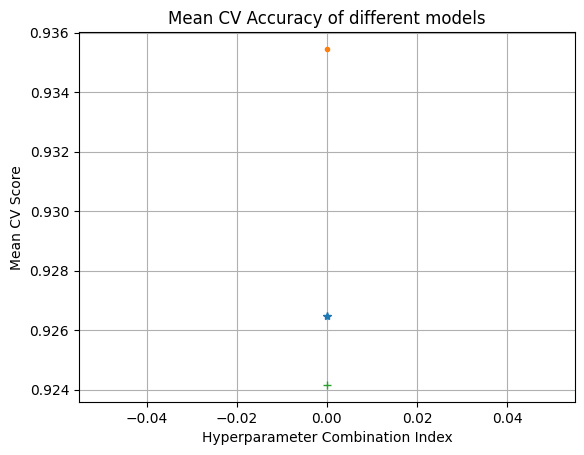

In [177]:
plt.plot(x["mean_test_score"].mean(), marker = "*" , label ="xgbb")
plt.plot(y["mean_test_score"].mean(), marker = ".", label = "rf")
plt.plot(z["mean_test_score"].mean(), marker = "+", label = "tree")
plt.title('Mean CV Accuracy of different models')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Mean CV Score')
plt.grid(True)
plt.show()

# The Random Forest model have the highest  mean accuracy